In [78]:
#Import libraries
import os
!pip install pandas
import pandas as pd
import numpy as np

In [79]:
#Set working directory
os.chdir("D:\Mohit")
print(os.getcwd())

D:\Mohit


In [80]:
# Import CSv
df = pd.read_excel("Absenteeism_at_work_Project.xls", sep =",")

In [81]:
# Analyse shape and data types
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [82]:
# Check count of unique values Present in data set
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [83]:
# Checking Data types and convertign appropriate ones
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [84]:
# Changing data types of following variable into category and rest as numerical
category = ["Reason for absence","ID","Month of absence","Day of the week","Seasons","Disciplinary failure","Education","Social drinker","Social smoker","Son","Pet"]
numeric = ["Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Weight","Height","Body mass index","Absenteeism time in hours"]
## Converting categorical_set data into category types from int/float
for i in category :
   df[i] = df[i].astype("category")

In [85]:
# Checking data types
df.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [86]:
# We will be replacing all 0 values from foloowing columns with NaN and then impute it with suitable method
for i in ["Reason for absence","Month of absence","Day of the week","Seasons","Education","ID","Age","Weight","Height","Body mass index"]:
       df[i] = df[i].replace(0,np.nan)

In [87]:
#Creating dataframe with missing values present in each variable
missing_value = pd.DataFrame(df.isnull().sum()).reset_index()
missing_value

,index,0
0,ID,0
1,Reason for absence,46
2,Month of absence,4
3,Day of the week,0
4,Seasons,0
5,Transportation expense,7
6,Distance from Residence to Work,3
7,Service time,3
8,Age,3
9,Work load Average/day,10


In [88]:
#Renaming variables of missing_val dataframe
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

In [89]:
#Calculating percentage missing value
missing_value['Missing_percentage'] = (missing_value['Missing_percentage']/len(df))*100
# Sorting missing_val in Descending order
missing_value = missing_value.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
# printing missing_val to analyse results
missing_value

,Variables,Missing_percentage
0,Reason for absence,6.216216
1,Body mass index,4.189189
2,Absenteeism time in hours,2.972973
3,Height,1.891892
4,Work load Average/day,1.351351
5,Education,1.351351
6,Transportation expense,0.945946
7,Son,0.810811
8,Disciplinary failure,0.810811
9,Hit target,0.810811


In [90]:
# Here all missing value percentage are leass than 30% so we can impute values and not drop any variables
# Here before imputing we need to take care that Our target variable (Absent time in hrs) also has missing value
# we cant impute them because it wont be a proper data and will hmper our model accuracy
# so we will drop all that observations where target variable has missing values
df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)

In [91]:
# Now we will see how many missing values are present in our dataset and go aheaad with suitable imputation method
missing_value = pd.DataFrame(df.isnull().sum()).reset_index()
# And repeat all steps to get final number of missing values
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_value['Missing_percentage'] = (missing_value['Missing_percentage']/len(df))*100
missing_value = missing_value.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_value

,Variables,Missing_percentage
0,Reason for absence,5.431755
1,Body mass index,4.038997
2,Height,1.949861
3,Education,1.392758
4,Work load Average/day,1.114206
5,Hit target,0.835655
6,Transportation expense,0.835655
7,Son,0.835655
8,Disciplinary failure,0.696379
9,Month of absence,0.557103


In [92]:
# Here we will use MODE method for imputation of categorical variable and Mean/Median method for continous variables
def impute_mean_mode(data_set):
   for i in data_set.columns.values:
       if data_set.loc[:,i].dtypes.name == 'int64'or data_set.loc[:,i].dtypes.name == 'float64':
           data_set[i] = round(data_set[i].fillna(data_set[i].mean()))
       ## mode method for categorical features
       elif data_set.loc[:,i].dtypes.name == 'category':
           data_set[i] = data_set[i].fillna(statistics.mode(data_set[i]))
   return data_set

In [93]:
def impute_median_mode(data_set):
   for i in data_set.columns.values:
       if data_set.loc[:,i].dtypes.name == 'int64'or data_set.loc[:,i].dtypes.name == 'float64':
           data_set[i] = data_set[i].fillna(data_set[i].median())
       ## mode method for categorical features
       elif data_set.loc[:,i].dtypes.name == 'category':
           data_set[i] = data_set[i].fillna(statistics.mode(data_set[i]))
   return data_set

In [94]:
import statistics
#Out of the these methods,we chose median mode method for imputation as it gave the closest results for numerical as well as categorical data
if(df.isnull().sum().sum()!=0):
   #df = impute_mean_mode(df)
   df = impute_median_mode(df)

In [95]:
# Now checking if any missing value is there or not
missing_value = pd.DataFrame(df.isnull().sum()).reset_index()
missing_value

,index,0
0,ID,0
1,Reason for absence,0
2,Month of absence,0
3,Day of the week,0
4,Seasons,0
5,Transportation expense,0
6,Distance from Residence to Work,0
7,Service time,0
8,Age,0
9,Work load Average/day,0


In [96]:
#copying the clean data for future use
df1 = df

Text(0, 0.5, 'Values')

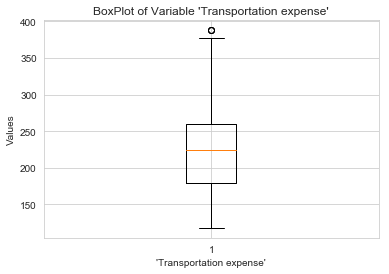

In [97]:
# We will use box plot method for all continous variable
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.boxplot(df['Transportation expense'])
plt.xlabel("'Transportation expense'")
plt.title("BoxPlot of Variable 'Transportation expense'")
plt.ylabel('Values')


Text(0, 0.5, 'Values')

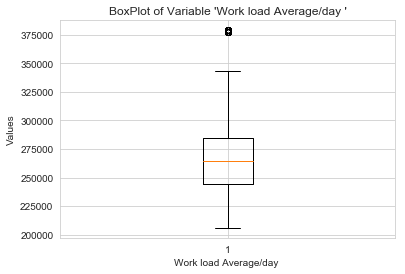

In [98]:
plt.boxplot(df['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("BoxPlot of Variable 'Work load Average/day '")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

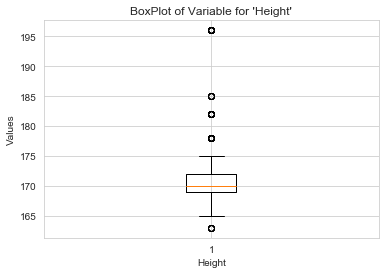

In [99]:
plt.boxplot(df['Height'])
plt.xlabel("Height")
plt.title("BoxPlot of Variable for 'Height'")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

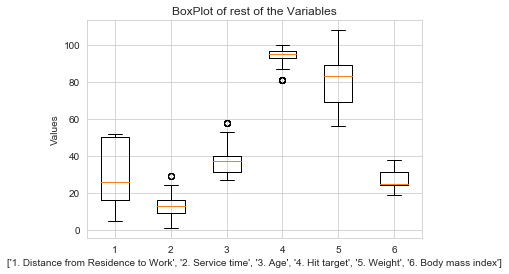

In [100]:
plt.boxplot([ df['Distance from Residence to Work'], df['Service time'], df['Age'], df['Hit target'], df['Weight'], df['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; ple

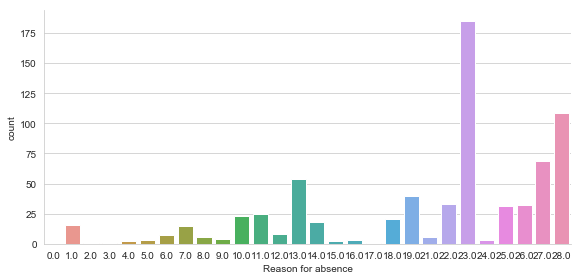

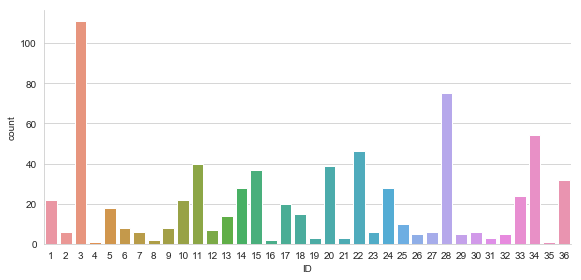

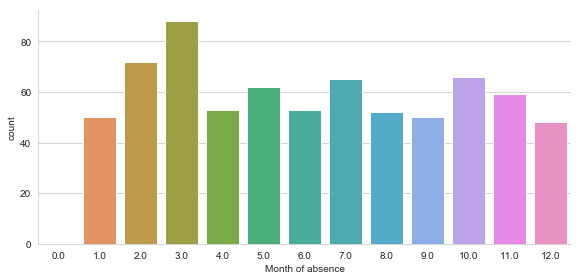

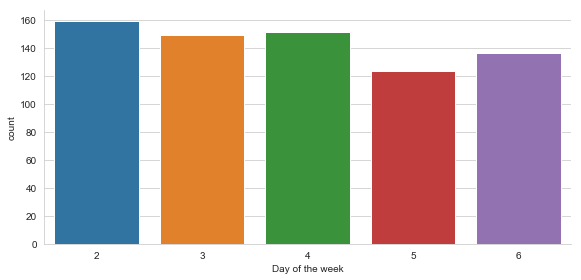

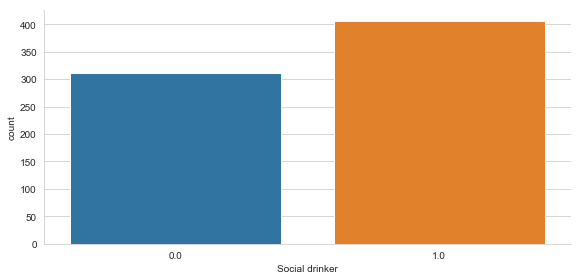

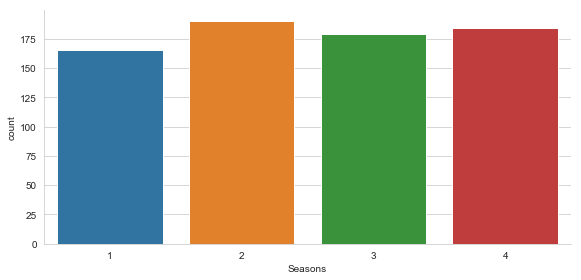

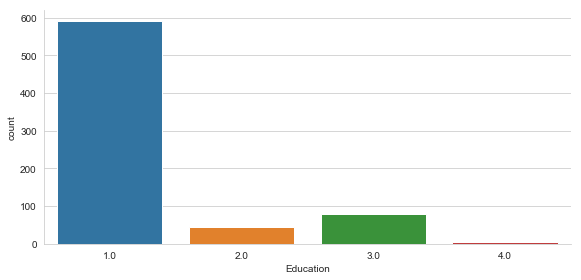

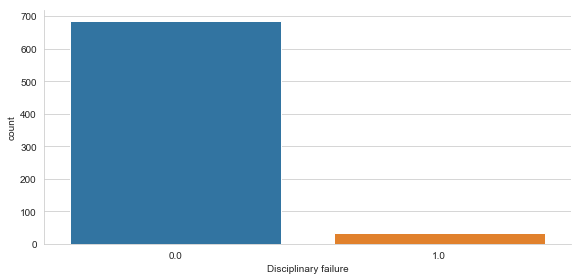

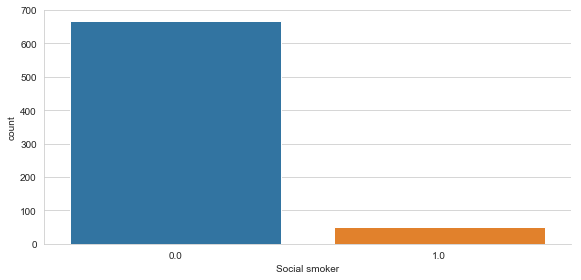

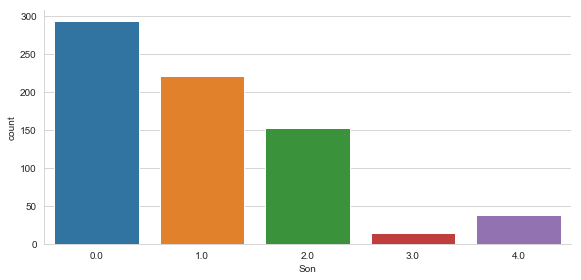

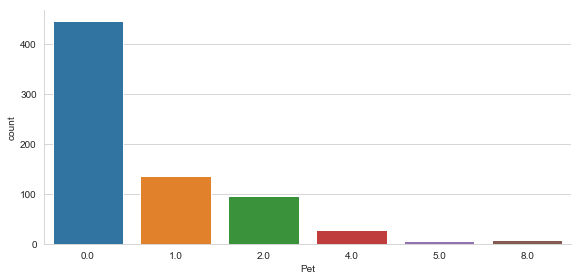

In [101]:
# here outliers are detected in continous variables, only 'height' and 'body mass index' are not having outliers
# other variable sare having outliers but we wont remove them ya substitute any value bcoz this outliers may be representing some extreme values of employees data which is important in deciding absenteeism time
# Now we wil analyse frequency distribution of a continous variable/ or we will plot histogram of a continous variable
sns.set_style("whitegrid")
sns.factorplot(data=df, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='ID', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Month of absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Day of the week', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Social drinker', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Disciplinary failure', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Social smoker', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Son', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Pet', kind= 'count',size=4,aspect=2)

Analysis drawn from the factorplot
  1.  Reason for absence 23 has highest count : Modical Consultation and then no. 28 : Dental Consultation
  2.  Employee ID 3, 28, 34, 22 and 11 has highest number of absent counts : Company can give warning to this employee or terminate them to reduce absenteeism time
  3.  March month has highest count which can be attributed to companies increment/review policy usually which results are declared in february and so many employees might be unhappy with review annual bonus and so they are coming late to office to show their anger/unhappiness
   4. Monday has highest records in absenteeism time; which shows after spending weekend people feel lazy to come on monday and so they come late to office
  5.  Person who is social drinker has more chances of absenteeism
  6. Person who has only studies till high school is absent for most of time as compared to graduate/post graduate
  7. Company in future must hire at least graduate candidate - who are responsible towards their work
  8. Rest other category feature behaviour are random cant be explained by hyphothesis

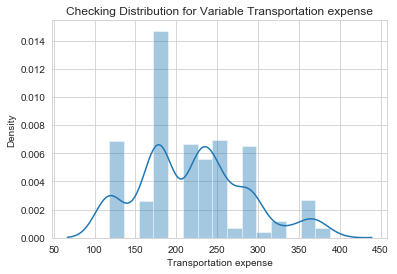

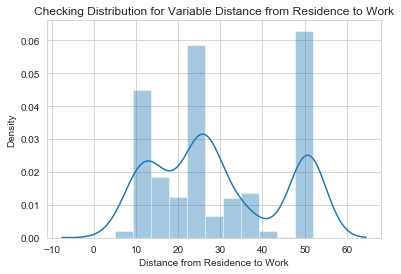

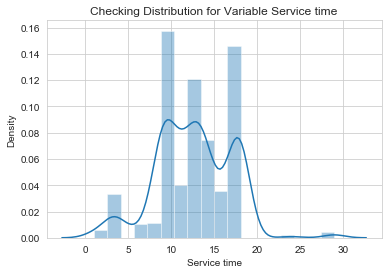

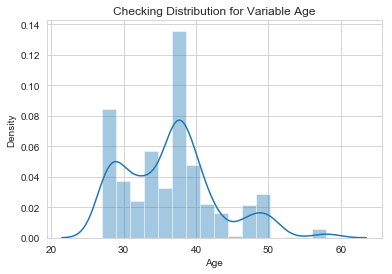

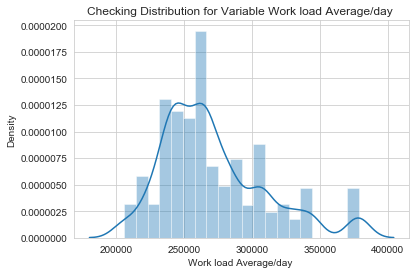

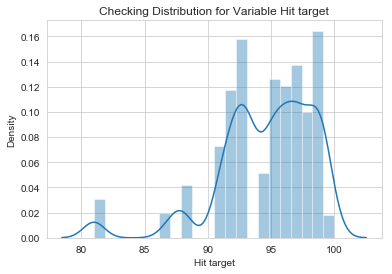

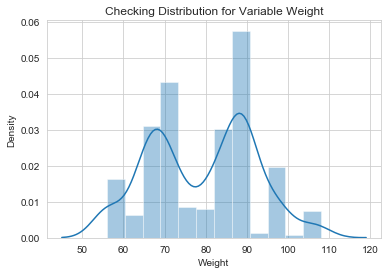

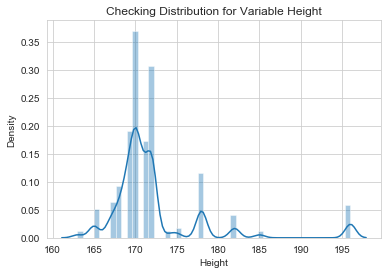

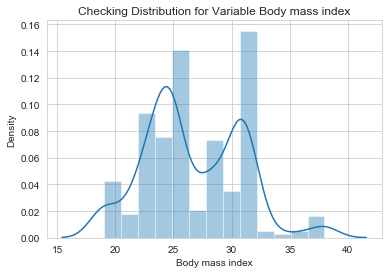

In [102]:
# Checking if there is any normally distributed variable in data
for i in numeric:
   if i == 'Absenteeism time in hours':
       continue
   sns.distplot(df[i],bins = 'auto')
   plt.title("Checking Distribution for Variable "+str(i))
   plt.ylabel("Density")
   plt.show()

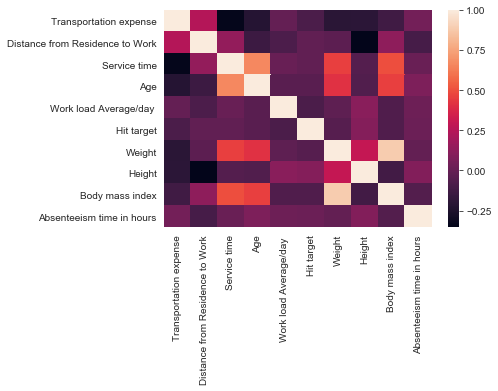

In [103]:
# Correlation Analysis of continous variable
%matplotlib inline
sns.heatmap(df[numeric].corr())

In [104]:
# We will remove weight variable from our dataset since it is highly correlated with BMI
df.head()
df = df.drop(columns=['Weight'])

In [105]:
numeric.remove('Weight')

Feature Scaling - Normalisation

In [106]:
# Since our continous variable are ranging from 1 to 100K of any value, while we build regression model it will inflate the target variable so we need to scale them to one common value
# Which is known as feature normalisation
for i in numeric:
   if i == 'Absenteeism time in hours':
       continue
   df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

In [107]:
# Now before building model we will encode categorical variables and create dummy variables to apply in model
df = pd.get_dummies(data = df, columns = category)

In [108]:
df.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Height',
       'Body mass index', 'Absenteeism time in hours',
       'Reason for absence_0.0',
       ...
       'Son_1.0', 'Son_2.0', 'Son_3.0', 'Son_4.0', 'Pet_0.0', 'Pet_1.0',
       'Pet_2.0', 'Pet_4.0', 'Pet_5.0', 'Pet_8.0'],
      dtype='object', length=116)

Model Building

In [109]:
# Using train_test_split sampling function for test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'Absenteeism time in hours'], df.iloc[:, 8], test_size = 0.30)

In [110]:
# Importing libraries for Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 11.729805044499765
Root Mean Squared Error For Test data = 5219119807834.878
R^2 Score(coefficient of determination) = -2.063421171915858e+23


In [111]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Building model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 1000).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_RF.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test,pred_test)))

Root Mean Squared Error For Training data = 5.695577801860542
Root Mean Squared Error For Test data = 11.730262130962837
R^2 Score(coefficient of determination) = -0.042338511127081535


Monthly Loss for Company

In [113]:
loss_data = df1[["Month of absence","Work load Average/day ","Service time","Absenteeism time in hours"]]

In [114]:
loss_data["Work Loss"]=(df1["Work load Average/day "]/df1["Service time"])*df1["Absenteeism time in hours"]
loss_data

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Month of absence,Work load Average/day,Service time,Absenteeism time in hours,Work Loss
0,7.0,239554.0,13.0,4.0,7.370892e+04
1,7.0,239554.0,18.0,0.0,0.000000e+00
2,7.0,239554.0,18.0,2.0,2.661711e+04
3,7.0,239554.0,14.0,4.0,6.844400e+04
4,7.0,239554.0,13.0,2.0,3.685446e+04
6,7.0,239554.0,3.0,8.0,6.388107e+05
7,7.0,239554.0,11.0,4.0,8.711055e+04
8,7.0,239554.0,14.0,40.0,6.844400e+05
9,7.0,239554.0,14.0,8.0,1.368880e+05
10,7.0,239554.0,11.0,8.0,1.742211e+05


In [115]:
monthly_loss = loss_data[["Month of absence","Work Loss"]]


In [116]:
monthly_loss = monthly_loss.groupby("Month of absence").sum()
monthly_loss

,Work Loss
Month of absence,
0.0,0.000000e+00
1.0,6.312631e+06
2.0,8.268540e+06
3.0,1.574969e+07
4.0,1.099949e+07
5.0,9.326395e+06
6.0,1.436224e+07
7.0,1.901538e+07
8.0,8.791557e+06
